# Make models
*R.A. Collenteur, University of Graz*

In [1]:
import pandas as pd
import pastas as ps

from glob import glob

import matplotlib.pyplot as plt

ps.set_log_level("ERROR")
ps.show_versions()

Python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.20.3
Scipy version: 1.7.3
Pandas version: 1.3.4
Pastas version: 0.19.0b
Matplotlib version: 3.5.0


## 1. load data

In [2]:
fnames = glob(f'../*.csv')
fnames

['..\\B16D0001001_BLOKZIJL.csv',
 '..\\B19C1016001_HEEMSKERK.csv',
 '..\\B32A0101001_LAREN.csv',
 '..\\B44D0063001_RIJEN.csv',
 '..\\B50E0111001_TILBURG.csv',
 '..\\B55A0354001_HULST.csv']

Fit report Head [m] B16D0001001_BLOKZIJL          Fit Statistics
nfev    76                     EVP           35.76
nobs    5871                   R2             0.35
noise   True                   RMSE           0.10
tmin    2000-01-01 00:00:00    AIC       -48535.04
tmax    2020-01-01 00:00:00    BIC       -48481.62
freq    D                      Obj            0.75
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (8 optimized)
                optimal   stderr     initial   vary
rch_A          0.040464  ±11.22%    0.642381   True
rch_n          0.755483   ±8.32%    1.000000   True
rch_a         15.701156  ±19.28%   10.000000   True
rch_srmax    160.663021  ±45.53%  250.000000   True
rch_lp         0.250000    ±nan%    0.250000  False
rch_ks        41.221167  ±44.34%  100.000000   True
rch_gamma      0.863817   ±3.30%    2.000000   True
rch_kv         1.000000    ±nan%    1.000000  False
rch_simax      2.000000    ±nan% 

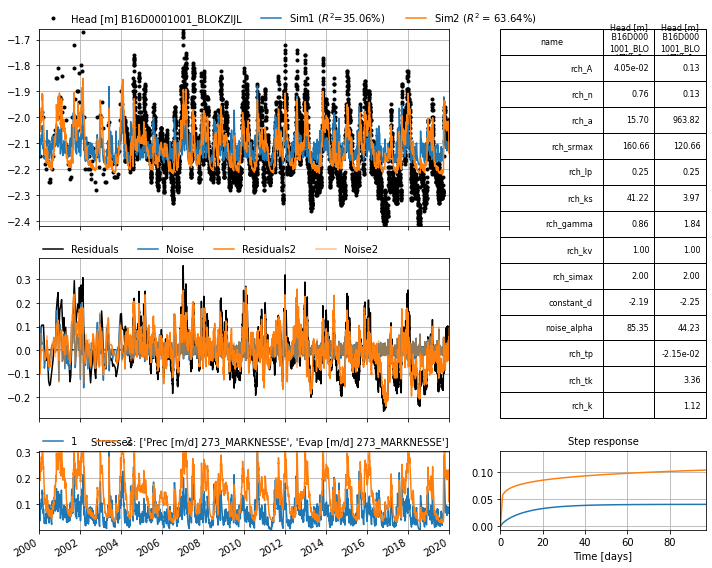

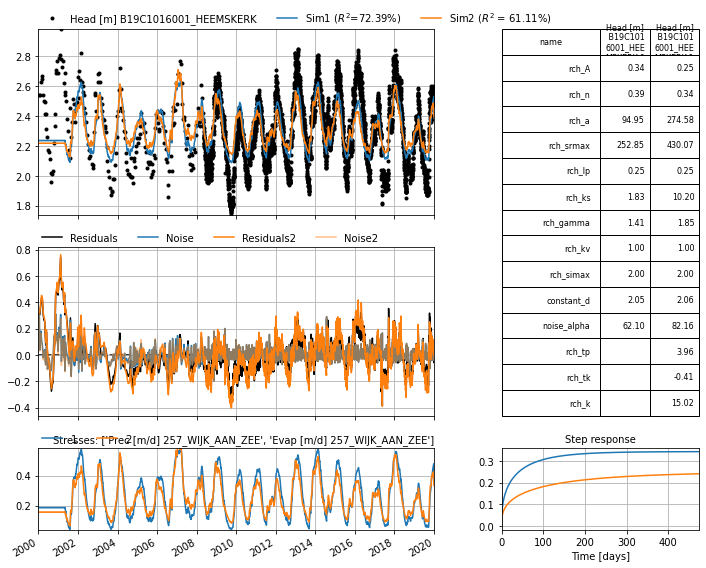

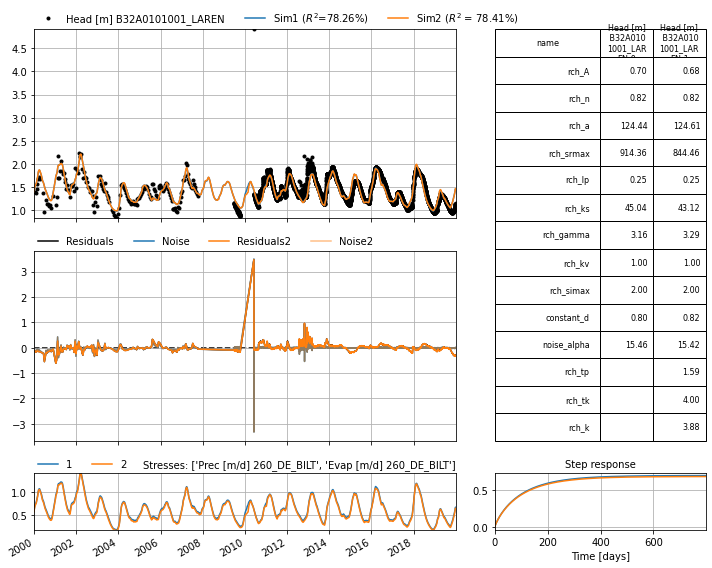

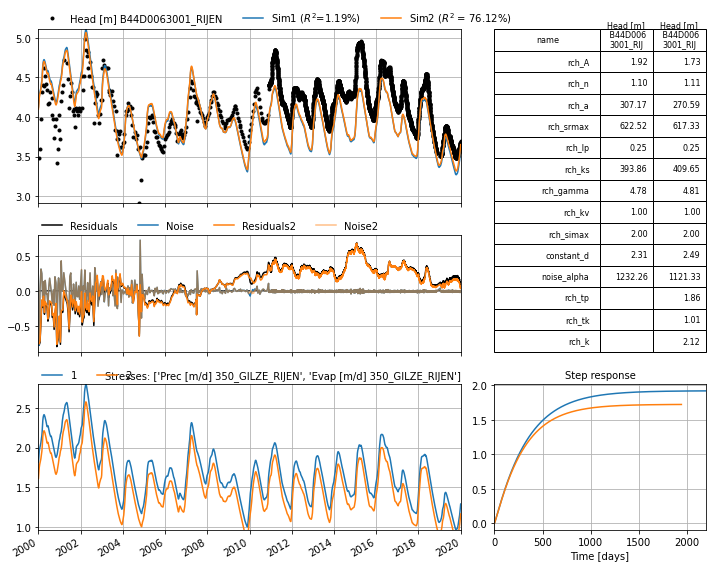

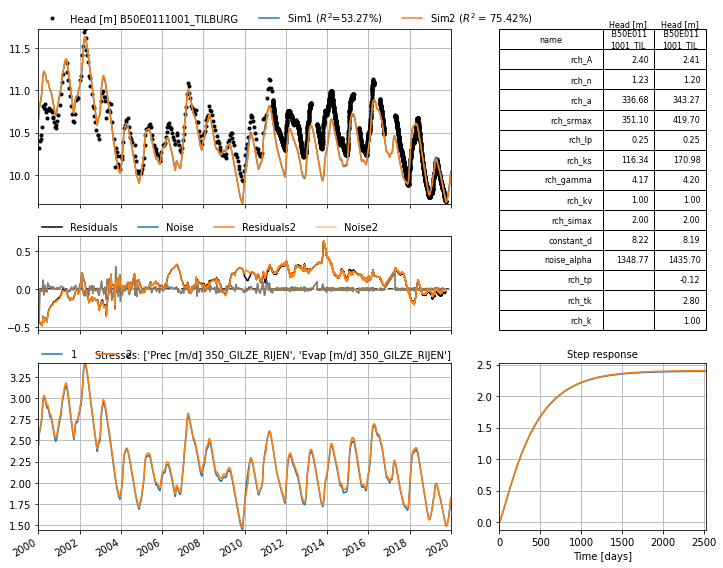

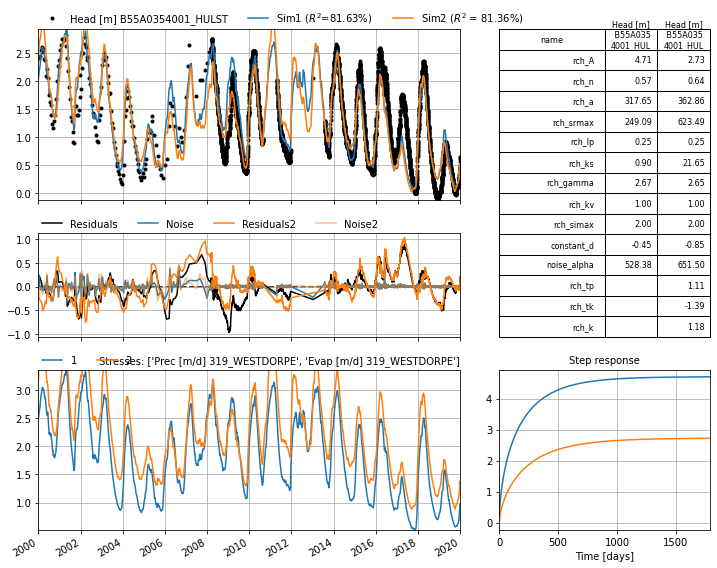

In [3]:
mls = {}

for fname in fnames:
    data = pd.read_csv(fname, index_col=0, parse_dates=True, sep=";").loc["1980":]
    
    head = data.iloc[:,0]
    prec = data.iloc[:,1].dropna()*1e3
    evap = data.iloc[:,2].dropna()*1e3
    temp = data.iloc[:,3].dropna()

    ml = ps.Model(head)
    
    sm = ps.RechargeModel(prec, evap, rfunc=ps.Gamma, name="rch", 
                          recharge=ps.rch.FlexModel())
    ml.add_stressmodel(sm)
    ml.solve(tmin="2000", tmax="2020")
    
    ml2 = ps.Model(head)
    
    sm2 = ps.RechargeModel(prec, evap, rfunc=ps.Gamma, name="rch", 
                          recharge=ps.rch.FlexModel(snow=True), temp=temp)
    ml2.add_stressmodel(sm2)
    # ml2.set_parameter("rch_kv", vary=True)
    ml2.solve(tmin="2000", tmax="2020")
        
    ps.plots.compare([ml, ml2])